In [1]:
#Titanic ML project

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
titanic_data = pd.read_csv('train.csv')

In [4]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


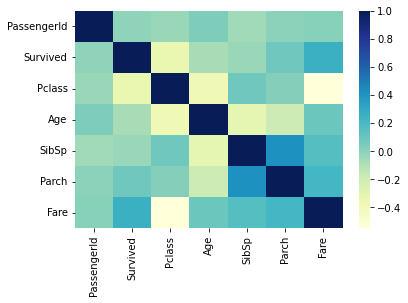

In [8]:
sns.heatmap(titanic_data.corr(),cmap='YlGnBu')
plt.show()

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices,test_indices in split.split(titanic_data,titanic_data[['Survived','Pclass','Sex']]):
    strat_train_set = titanic_data.loc[train_indices]
    strat_test_set = titanic_data.loc[test_indices]
    

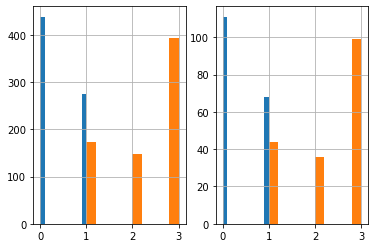

In [13]:
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()

plt.show()

In [14]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 692 to 723
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          572 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        161 non-null    object 
 11  Embarked     711 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [24]:
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator,TransformerMixin):
    def fit(self,x,y=None):
        return self
    def transform(self,X):
        imputer = SimpleImputer(strategy = 'mean')
        X['Age']=imputer.fit_transform(X[['Age']])
        return X


In [37]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator,TransformerMixin):
    def fit(self,x,y=None):
        return self
    def transform(self,X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()
        
        column_names = ['C','S','Q','N']
        
        for i in range(len(matrix.T)):
            X[column_names[i]]=matrix.T[i]
        
        matrix = encoder.fit_transform(X[['Sex']]).toarray()
        column_names = ['Female','Male']
        for i in range(len(matrix.T)):
            X[column_names[i]]=matrix.T[i]
        
        return X

In [38]:
class FeatureDropper(BaseEstimator,TransformerMixin):
    def fit(self,x,y=None):
        return self
    def transform(self, X):
        return X.drop(["Embarked","Name","Cabin","Sex","Ticket","N"],axis=1,errors="ignore")

In [39]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("ageimputer",AgeImputer()),("featureencoder",FeatureEncoder()),("featuredropper",FeatureDropper())])

                     


In [40]:
strat_train_set = pipeline.fit_transform(strat_train_set)


In [41]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
692,693,1,3,29.728881,0,0,56.4958,0.0,0.0,1.0,0.0,1.0
357,358,0,2,38.000000,0,0,13.0000,0.0,0.0,1.0,1.0,0.0
787,788,0,3,8.000000,4,1,29.1250,0.0,1.0,0.0,0.0,1.0
590,591,0,3,35.000000,0,0,7.1250,0.0,0.0,1.0,0.0,1.0
546,547,1,2,19.000000,1,0,26.0000,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
541,542,0,3,9.000000,4,2,31.2750,0.0,0.0,1.0,1.0,0.0
735,736,0,3,28.500000,0,0,16.1000,0.0,0.0,1.0,0.0,1.0
113,114,0,3,20.000000,1,0,9.8250,0.0,0.0,1.0,1.0,0.0
780,781,1,3,13.000000,0,0,7.2292,1.0,0.0,0.0,1.0,0.0


In [42]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 692 to 723
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [44]:
from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop(['Survived'],axis = 1)
Y = strat_train_set['Survived']

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
Y_data = Y.to_numpy()

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

param_grid = [
    {'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20, 25],
    'max_features': ['auto', 2, 4, 6, 8]
}
]

grid_search = GridSearchCV(clf,param_grid,cv=3,scoring="accuracy",return_train_score=True)
grid_search.fit(X_data,Y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [5, 10, 15, 20, 25],
                          'max_features': ['auto', 2, 4, 6, 8],
                          'n_estimators': [100, 200, 300, 400, 500]}],
             return_train_score=True, scoring='accuracy')

In [51]:
strat_test_set = pipeline.fit_transform(strat_test_set)

In [54]:
X = strat_test_set.drop(['Survived'],axis = 1)
Y = strat_test_set['Survived']

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X)
Y_data_test = Y.to_numpy()

In [56]:
final_clf = grid_search.best_estimator_
final_clf.score(X_data_test,Y_data_test)

0.8156424581005587

In [58]:
final_data = pipeline.fit_transform(titanic_data)

In [59]:
X_final = final_data.drop(['Survived'],axis = 1)
Y_final = final_data['Survived']

scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final)
Y_data_final = Y_final.to_numpy()

In [60]:
final_clf = RandomForestClassifier()

param_grid = [
    {'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20, 25],
    'max_features': ['auto', 2, 4, 6, 8]
}
]

grid_search = GridSearchCV(final_clf,param_grid,cv=3,scoring="accuracy",return_train_score=True)
grid_search.fit(X_data_final,Y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [5, 10, 15, 20, 25],
                          'max_features': ['auto', 2, 4, 6, 8],
                          'n_estimators': [100, 200, 300, 400, 500]}],
             return_train_score=True, scoring='accuracy')

In [62]:
final_final_clf = grid_search.best_estimator_

In [61]:
titanic_test_data = pd.read_csv('test.csv')

In [64]:
titanic_test_data = pipeline.fit_transform(titanic_test_data)

In [77]:
X_final_test = titanic_test_data
X_final_test = X_final_test.fillna(method="ffill")

scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)



In [78]:
predictions = final_final_clf.predict(X_data_final_test)

In [80]:
final_df = pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived'] = predictions
final_df.to_csv("predictions.csv",index=False)

In [81]:
final_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
